In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

### Set workspace

Create dataset with classes

In [201]:
d_classes = pd.read_csv('files.csv', delimiter=';')

d_classes.sort_values(by=['folder'], inplace=True)
d_classes.reset_index(drop=True, inplace=True)
d_classes.drop(columns = ['Unnamed: 0','folder'], inplace=True)

d_classes

,code,class
0,MR,2
1,MR,2
2,MR,2
3,MR,2
4,MR,2
...,...,...
463,FB,8
464,FF,6
465,FF,6
466,FS,7


Create list of datasets

In [202]:
#path = "C:/Users/markh/Desktop/Università/Healthcare Data/SL4HD/Train2/"
path = "C:/Users/giuli/OneDrive/Desktop/SL4HD/Train2/"
#path = "C:/Users/hp/OneDrive - Politecnico di Milano/Università/STATISTICAL_LEARNING_FOR_HEALTHCAREDATA/SL4HD/Train2/"

all_files = glob.glob(path + "*.csv")

li = []

for filename in all_files:
    d_file = pd.read_csv(filename, names = ["x","y","z","t"])
    li.append(d_file)

In [203]:
#divide li in train and test using the command train_test_split
from sklearn.model_selection import train_test_split
li, li_test, d_classes, d_classes_test = train_test_split(li, d_classes, test_size=0.2, random_state=42, stratify=d_classes['class'], shuffle=True)

In [204]:
d_classes['class10']=d_classes['class']

In [205]:
d_classes['class']=d_classes['class'].replace([1, 2, 3, 4, 5], 1)
d_classes['class']=d_classes['class'].replace([6, 7, 8], 2)
d_classes['class']=d_classes['class'].replace([9, 10], 3)

d_classes_test['class']=d_classes_test['class'].replace([1, 2, 3, 4, 5], 1)
d_classes_test['class']=d_classes_test['class'].replace([6, 7, 8], 2)
d_classes_test['class']=d_classes_test['class'].replace([9, 10], 3)

In [206]:
d_classes.reset_index(drop=True, inplace=True)
d_classes_test.reset_index(drop=True, inplace=True)

### **Feature Engineering**

#### Mean

<AxesSubplot:xlabel='class'>

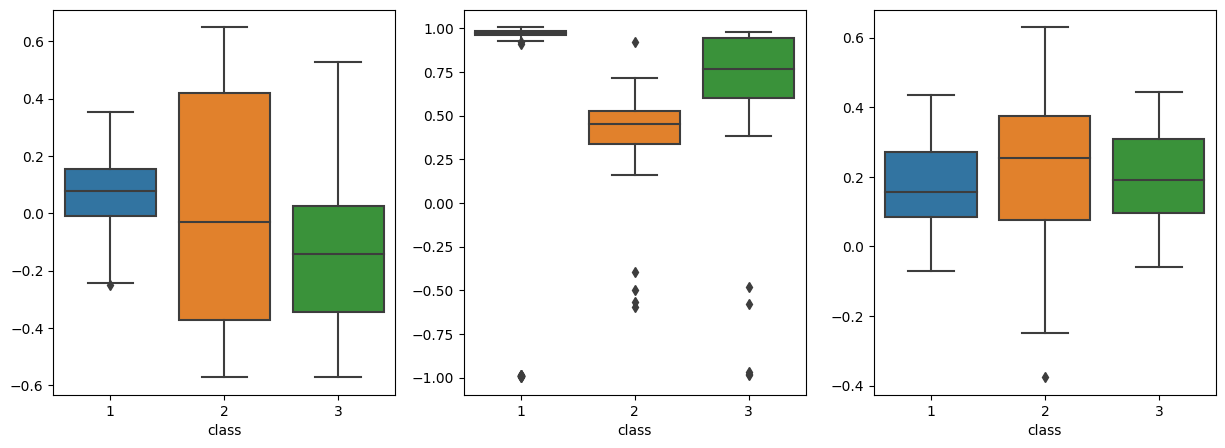

In [207]:
means_x = []
means_y = []
means_z = []
means_x_test = []
means_y_test = []
means_z_test = []

for i in np.arange(len(li)):
    means_x.append(li[i].x.mean())
    means_y.append(li[i].y.mean())
    means_z.append(li[i].z.mean())

for i in np.arange(len(li_test)):
    means_x_test.append(li_test[i].x.mean())
    means_y_test.append(li_test[i].y.mean())
    means_z_test.append(li_test[i].z.mean())

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=means_x,data=d_classes,ax=axs[0])
sns.boxplot(x='class',y=means_y,data=d_classes,ax=axs[1])
sns.boxplot(x='class',y=means_z,data=d_classes,ax=axs[2])

#### Variance

<AxesSubplot:xlabel='class'>

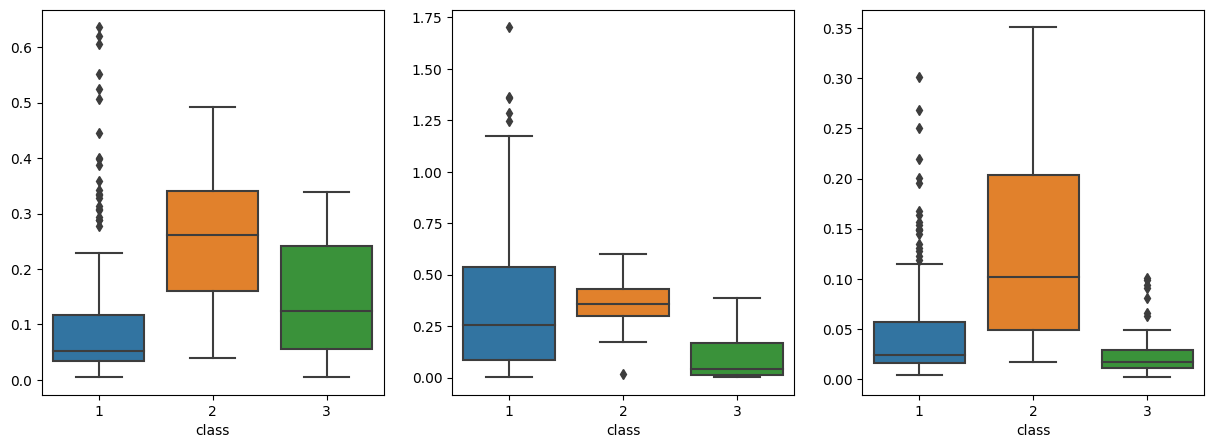

In [208]:
vars_x = []
vars_y = []
vars_z = []
vars_x_test = []
vars_y_test = []
vars_z_test = []

for i in np.arange(len(li)):
    vars_x.append(li[i].x.var())
    vars_y.append(li[i].y.var())
    vars_z.append(li[i].z.var())

for i in np.arange(len(li_test)):
    vars_x_test.append(li_test[i].x.var())
    vars_y_test.append(li_test[i].y.var())
    vars_z_test.append(li_test[i].z.var())

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=vars_x,data=d_classes,ax=axs[0])
sns.boxplot(x='class',y=vars_y,data=d_classes,ax=axs[1])
sns.boxplot(x='class',y=vars_z,data=d_classes,ax=axs[2])

#### Median

<AxesSubplot:xlabel='class'>

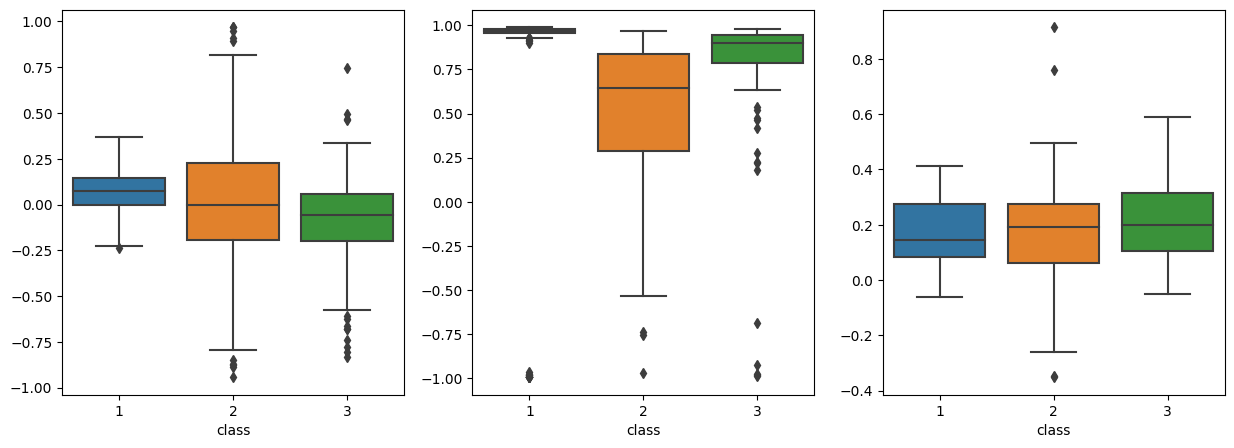

In [209]:
median_x = []
median_y = []
median_z = []
median_x_test = []
median_y_test = []
median_z_test = []

for i in np.arange(len(li)):
    t = np.asarray(li[i].t)

    median_x.append(np.median(li[i].x))
    median_y.append(np.median(li[i].y))
    median_z.append(np.median(li[i].z))

for i in np.arange(len(li_test)):
    median_x_test.append(np.median(li_test[i].x))
    median_y_test.append(np.median(li_test[i].y))
    median_z_test.append(np.median(li_test[i].z))

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=median_x,data=d_classes,ax=axs[0])
sns.boxplot(x='class',y=median_y,data=d_classes,ax=axs[1])
sns.boxplot(x='class',y=median_z,data=d_classes,ax=axs[2])

#### Mode

<AxesSubplot:xlabel='class'>

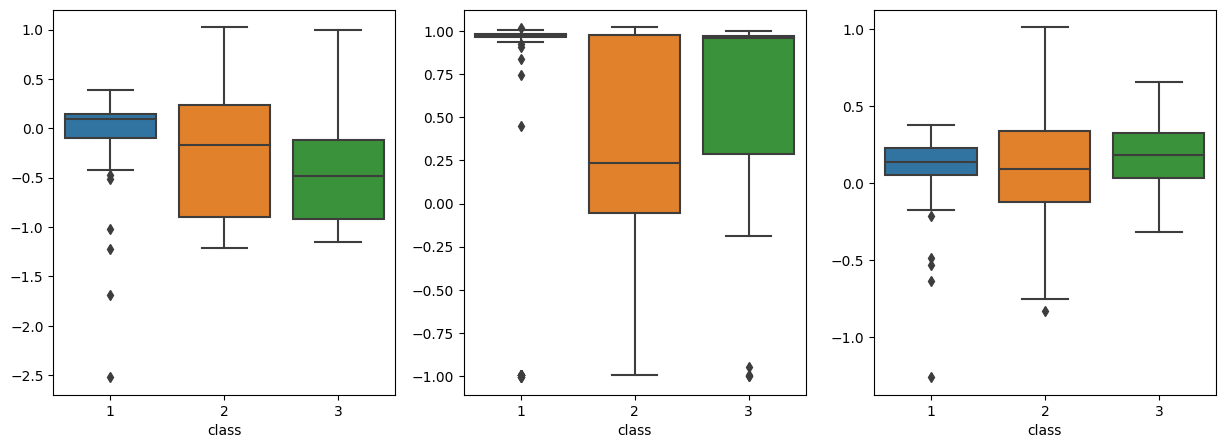

In [210]:
from scipy import stats

mode_x = []
mode_y = []
mode_z = []
mode_x_test = []
mode_y_test = []
mode_z_test = []

for i in np.arange(len(li)):
    mode_x.append(stats.mode(li[i].x)[0][0])
    mode_y.append(stats.mode(li[i].y)[0][0])
    mode_z.append(stats.mode(li[i].z)[0][0])

for i in np.arange(len(li_test)):
    mode_x_test.append(stats.mode(li_test[i].x)[0][0])
    mode_y_test.append(stats.mode(li_test[i].y)[0][0])
    mode_z_test.append(stats.mode(li_test[i].z)[0][0])

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=mode_x,data=d_classes,ax=axs[0])
sns.boxplot(x='class',y=mode_y,data=d_classes,ax=axs[1])
sns.boxplot(x='class',y=mode_z,data=d_classes,ax=axs[2])

#### RMS

<AxesSubplot:xlabel='class'>

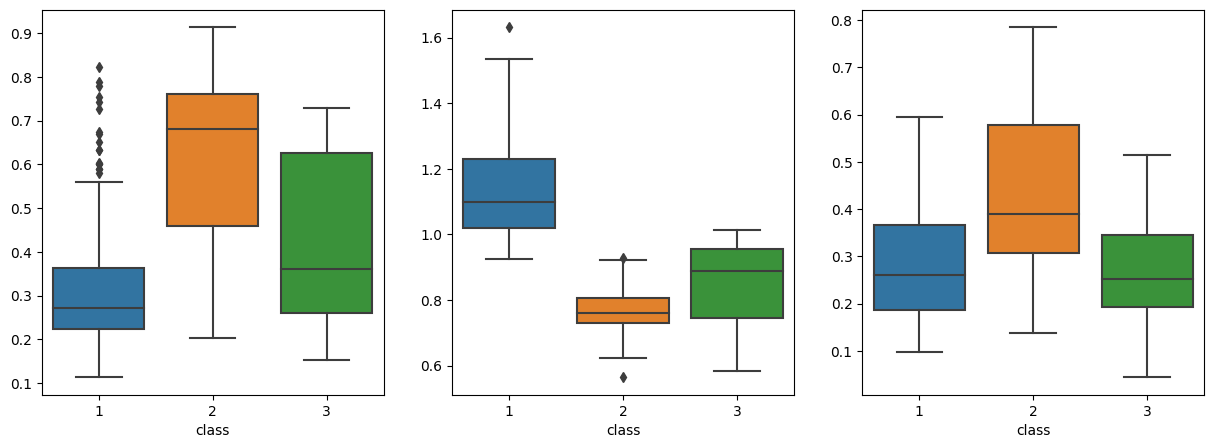

In [211]:
rms_x = []
rms_y = []
rms_z = []
rms_x_test = []
rms_y_test = []
rms_z_test = []

for i in np.arange(len(li)):
    rms_x.append(np.sqrt(np.mean(np.square(li[i].x))))
    rms_y.append(np.sqrt(np.mean(np.square(li[i].y))))
    rms_z.append(np.sqrt(np.mean(np.square(li[i].z))))

for i in np.arange(len(li_test)):
    rms_x_test.append(np.sqrt(np.mean(np.square(li_test[i].x))))
    rms_y_test.append(np.sqrt(np.mean(np.square(li_test[i].y))))
    rms_z_test.append(np.sqrt(np.mean(np.square(li_test[i].z))))

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=rms_x,data=d_classes,ax=axs[0])

sns.boxplot(x='class',y=rms_y,data=d_classes,ax=axs[1])

sns.boxplot(x='class',y=rms_z,data=d_classes,ax=axs[2])

#### Interquartile Range

<AxesSubplot:xlabel='class'>

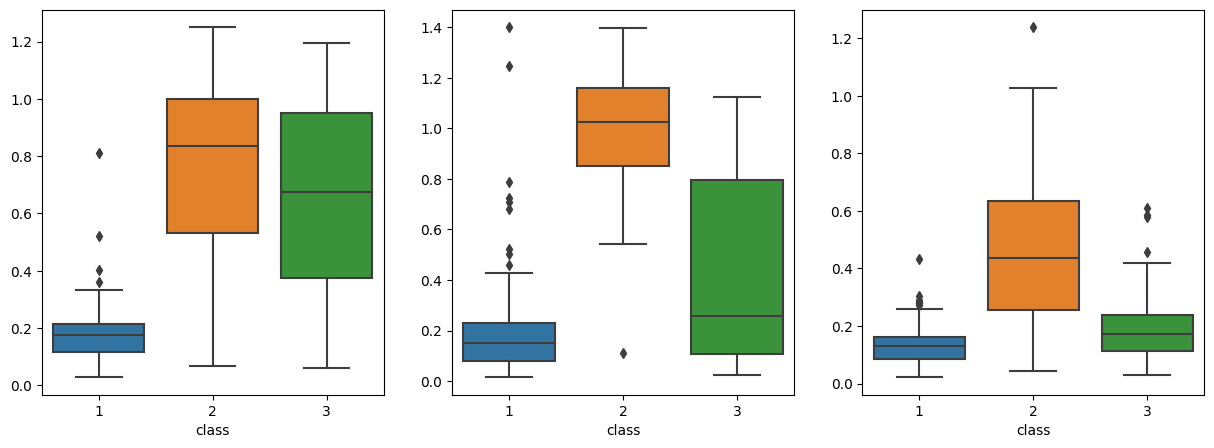

In [212]:
interq_x = []
interq_y = []
interq_z = []
interq_x_test = []
interq_y_test = []
interq_z_test = []

for i in np.arange(len(li)):
    interq_x.append(np.percentile(li[i].x, 75) - np.percentile(li[i].x, 25))
    interq_y.append(np.percentile(li[i].y, 75) - np.percentile(li[i].y, 25))
    interq_z.append(np.percentile(li[i].z, 75) - np.percentile(li[i].z, 25))

for i in np.arange(len(li_test)):
    interq_x_test.append(np.percentile(li_test[i].x, 75) - np.percentile(li_test[i].x, 25))
    interq_y_test.append(np.percentile(li_test[i].y, 75) - np.percentile(li_test[i].y, 25))
    interq_z_test.append(np.percentile(li_test[i].z, 75) - np.percentile(li_test[i].z, 25))

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=interq_x,data=d_classes,ax=axs[0])

sns.boxplot(x='class',y=interq_y,data=d_classes,ax=axs[1])

sns.boxplot(x='class',y=interq_z,data=d_classes,ax=axs[2])

#### Min-Max & Arg-Max - Arg-Min (with polynomials)

In [213]:
 # Create columns of the output dataset

k = 3
    # Create columns of the output dataset
columns = []
for prefix in ['x', 'y', 'z']:
    for i in range(0, k+1):
        columns.append(f"{prefix}_{i}")
d_poly = pd.DataFrame(columns=columns)
d_poly_test = pd.DataFrame(columns=columns)

# Loop over all the .csv tables
for i in np.arange(len(li)):

    # Get values from every table
    x = np.asarray(li[i].x)
    y = np.asarray(li[i].y)
    z = np.asarray(li[i].z)
    t = np.asarray(li[i].t)

    # Get coefficients of the polynomial fit of order k of x, y, z
    coef_x = np.polyfit(t,x,deg=k,full=False)
    coef_y = np.polyfit(t,y,deg=k,full=False)
    coef_z = np.polyfit(t,z,deg=k,full=False)

    # Add coefficients to the final dataset
    row = []
    for j in np.arange(k+1):
        row.append(coef_x[j])
    for j in np.arange(k+1):
        row.append(coef_y[j])
    for j in np.arange(k+1):
        row.append(coef_z[j])
    d_poly.loc[i] = row

for i in np.arange(len(li_test)):
    # Get values from every table
    x = np.asarray(li_test[i].x)
    y = np.asarray(li_test[i].y)
    z = np.asarray(li_test[i].z)
    t = np.asarray(li_test[i].t)

    # Get coefficients of the polynomial fit of order k of x, y, z
    coef_x = np.polyfit(t,x,deg=k,full=False)
    coef_y = np.polyfit(t,y,deg=k,full=False)
    coef_z = np.polyfit(t,z,deg=k,full=False)

    # Add coefficients to the final dataset
    row = []
    for j in np.arange(k+1):
        row.append(coef_x[j])
    for j in np.arange(k+1):
        row.append(coef_y[j])
    for j in np.arange(k+1):
        row.append(coef_z[j])
    d_poly_test.loc[i] = row


<AxesSubplot:xlabel='class'>

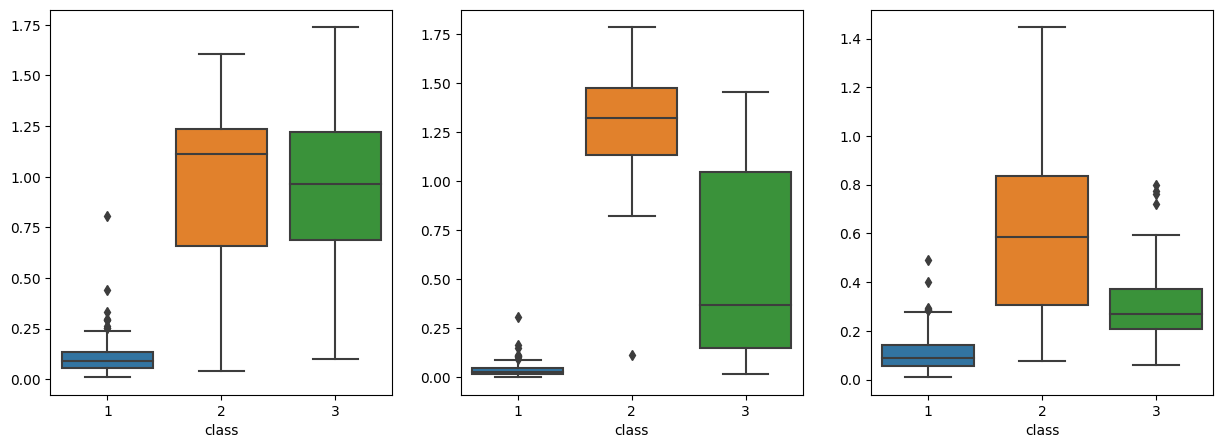

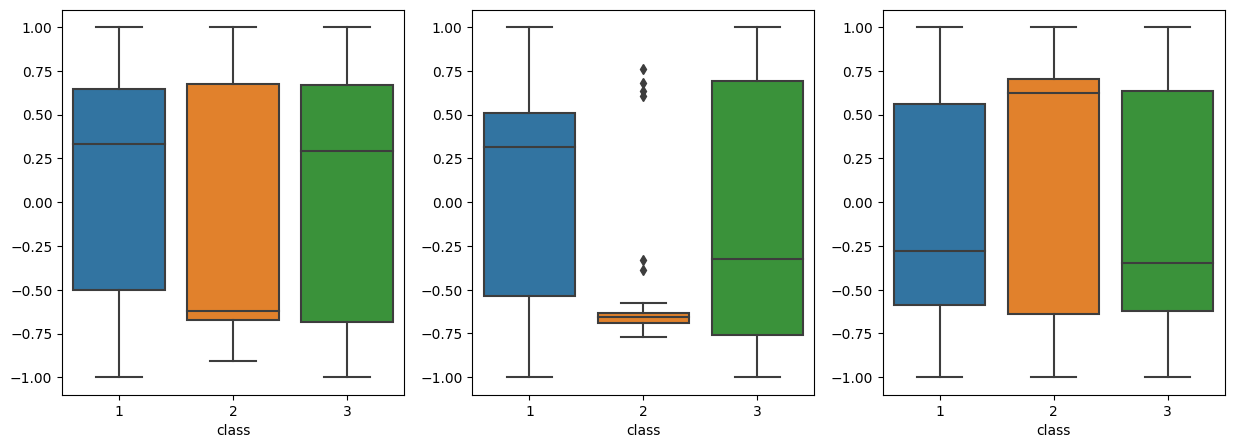

In [214]:
delta_x = []
deltarg_x = []
delta_y = []
deltarg_y = []
delta_z = []
deltarg_z = []
delta_x_test = []
deltarg_x_test = []
delta_y_test = []
deltarg_y_test = []
delta_z_test = []
deltarg_z_test = []

for i in np.arange(len(li)):

    t = np.asarray(li[i].t)
    len_t = len(li[i])

    coef_x = d_poly.iloc[i,:4]
    poly_x = np.poly1d(coef_x)
    delta_x.append(np.max(poly_x(t))-np.min(poly_x(t)))
    deltarg_x.append((np.argmax(poly_x(t))-np.argmin(poly_x(t)))/len_t)
   

    coef_y = d_poly.iloc[i,4:8]
    poly_y = np.poly1d(coef_y)
    delta_y.append(np.max(poly_y(t))-np.min(poly_y(t)))
    deltarg_y.append((np.argmax(poly_y(t))-np.argmin(poly_y(t)))/len_t) 
    

    coef_z = d_poly.iloc[i,8:]
    poly_z = np.poly1d(coef_z)
    delta_z.append(np.max(poly_z(t))-np.min(poly_z(t)))
    deltarg_z.append((np.argmax(poly_z(t))-np.argmin(poly_z(t)))/len_t)

for i in np.arange(len(li_test)):
    t = np.asarray(li_test[i].t)
    len_t = len(li_test[i])

    coef_x = d_poly_test.iloc[i,:4]
    poly_x = np.poly1d(coef_x)
    delta_x_test.append(np.max(poly_x(t))-np.min(poly_x(t)))
    deltarg_x_test.append((np.argmax(poly_x(t))-np.argmin(poly_x(t)))/len_t)
   

    coef_y = d_poly_test.iloc[i,4:8]
    poly_y = np.poly1d(coef_y)
    delta_y_test.append(np.max(poly_y(t))-np.min(poly_y(t)))
    deltarg_y_test.append((np.argmax(poly_y(t))-np.argmin(poly_y(t)))/len_t) 
    

    coef_z = d_poly_test.iloc[i,8:]
    poly_z = np.poly1d(coef_z)
    delta_z_test.append(np.max(poly_z(t))-np.min(poly_z(t)))
    deltarg_z_test.append((np.argmax(poly_z(t))-np.argmin(poly_z(t)))/len_t)

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=delta_x,data=d_classes,ax=axs[0])
sns.boxplot(x='class',y=delta_y,data=d_classes,ax=axs[1])
sns.boxplot(x='class',y=delta_z,data=d_classes,ax=axs[2])

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=deltarg_x,data=d_classes,ax=axs[0])
sns.boxplot(x='class',y=deltarg_y,data=d_classes,ax=axs[1])
sns.boxplot(x='class',y=deltarg_z,data=d_classes,ax=axs[2])

#### Length

<AxesSubplot:xlabel='class'>

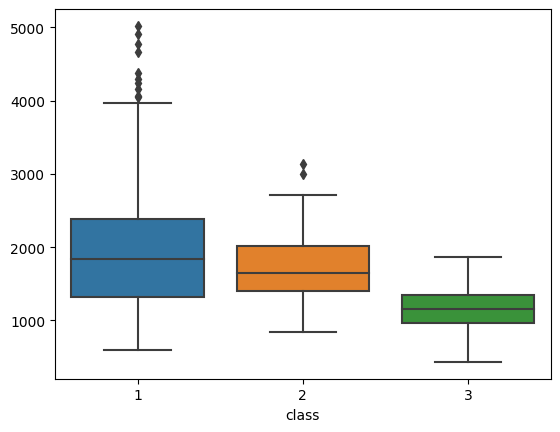

In [215]:
length = []
length_test = []

for i in np.arange(len(li)): 
    length.append(len(li[i]))
    
for i in np.arange(len(li_test)):
    length_test.append(len(li_test[i]))
    
sns.boxplot(x='class',y=length, data=d_classes)

#### %Peaks over Threshold

<AxesSubplot:xlabel='class'>

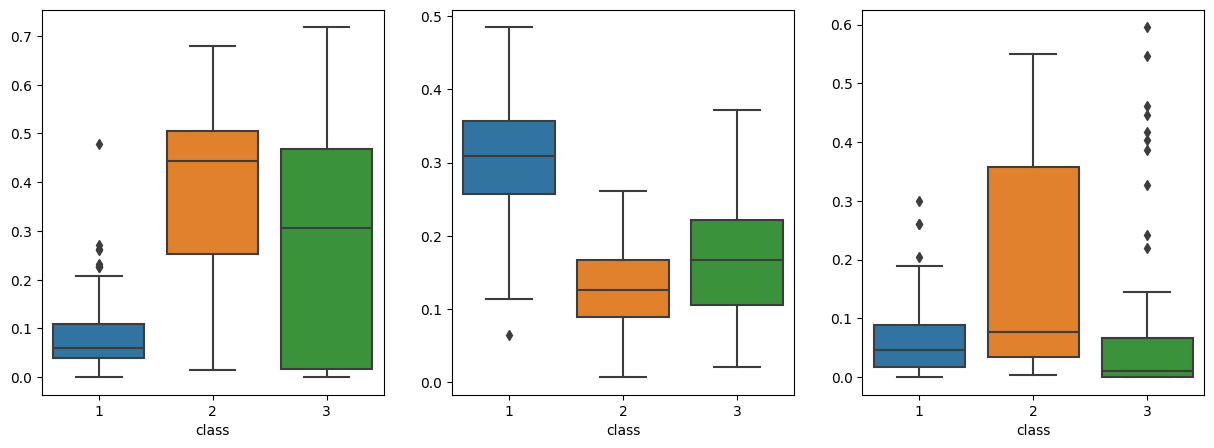

In [216]:
peaks_x = []
peaks_y = []
peaks_z = []
peaks_x_test = []
peaks_y_test = []
peaks_z_test = []
eps_x = 0.5
eps_y = 1
eps_z = 0.5

for i, item in enumerate(li):
    count_x, count_y, count_z = 0, 0, 0
    len_t = len(item.t)
    x_vals = item.x
    y_vals = item.y
    z_vals = item.z
    for j, t_val in enumerate(item.t):
        if abs(x_vals[j]) > eps_x:
            count_x += 1
        if abs(y_vals[j]) > eps_y:
            count_y += 1
        if abs(z_vals[j]) > eps_z:
            count_z += 1
    peaks_x.append(count_x/len_t)
    peaks_y.append(count_y/len_t)
    peaks_z.append(count_z/len_t)

for i, item in enumerate(li_test):
    count_x, count_y, count_z = 0, 0, 0
    len_t = len(item.t)
    x_vals = item.x
    y_vals = item.y
    z_vals = item.z
    for j, t_val in enumerate(item.t):
        if abs(x_vals[j]) > eps_x:
            count_x += 1
        if abs(y_vals[j]) > eps_y:
            count_y += 1
        if abs(z_vals[j]) > eps_z:
            count_z += 1
    peaks_x_test.append(count_x/len_t)
    peaks_y_test.append(count_y/len_t)
    peaks_z_test.append(count_z/len_t)

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=peaks_x,data=d_classes,ax=axs[0])
sns.boxplot(x='class',y=peaks_y,data=d_classes,ax=axs[1])
sns.boxplot(x='class',y=peaks_z,data=d_classes,ax=axs[2])

#### %Positive Points

<AxesSubplot:xlabel='class'>

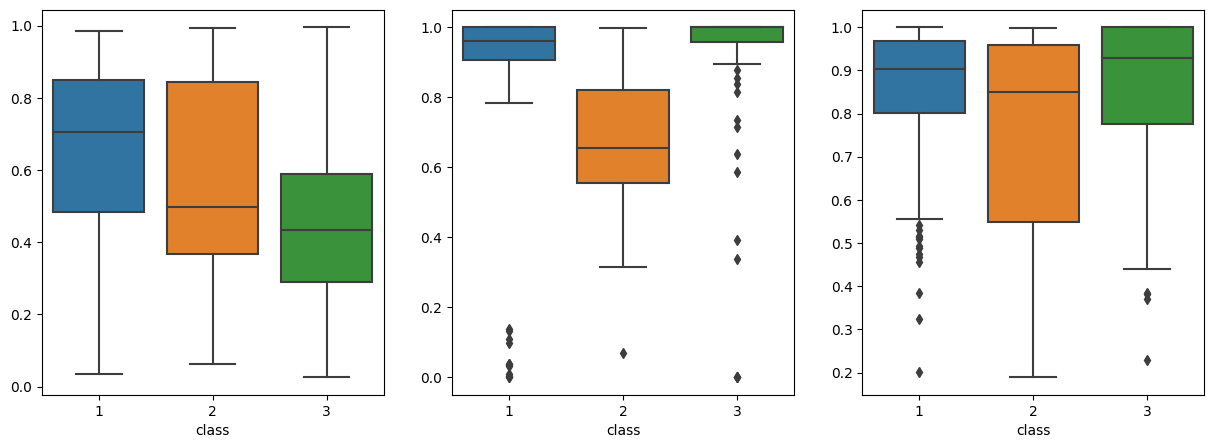

In [217]:
pn_x = []
pn_y = []
pn_z = []
pn_x_test = []
pn_y_test = []
pn_z_test = []

for i in np.arange(len(li)):
    pos_x = li[i][li[i].x>=0].x.count()
    neg_x = li[i][li[i].x<0].x.count()

    pos_y = li[i][li[i].y>=0].y.count()
    neg_y = li[i][li[i].y<0].y.count()

    pos_z = li[i][li[i].z>=0].z.count()
    neg_z = li[i][li[i].z<0].z.count()

    pn_x.append(pos_x/(pos_x+neg_x))
    pn_y.append(pos_y/(pos_y+neg_y))
    pn_z.append(pos_z/(pos_z+neg_z))

for i in np.arange(len(li_test)):
    pos_x = li_test[i][li_test[i].x>=0].x.count()
    neg_x = li_test[i][li_test[i].x<0].x.count()

    pos_y = li_test[i][li_test[i].y>=0].y.count()
    neg_y = li_test[i][li_test[i].y<0].y.count()

    pos_z = li_test[i][li_test[i].z>=0].z.count()
    neg_z = li_test[i][li_test[i].z<0].z.count()

    pn_x_test.append(pos_x/(pos_x+neg_x))
    pn_y_test.append(pos_y/(pos_y+neg_y))
    pn_z_test.append(pos_z/(pos_z+neg_z))

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=pn_x,data=d_classes,ax=axs[0])
sns.boxplot(x='class',y=pn_y,data=d_classes,ax=axs[1])
sns.boxplot(x='class',y=pn_z,data=d_classes,ax=axs[2])

#### %Zero Crossing Points

<AxesSubplot:xlabel='class'>

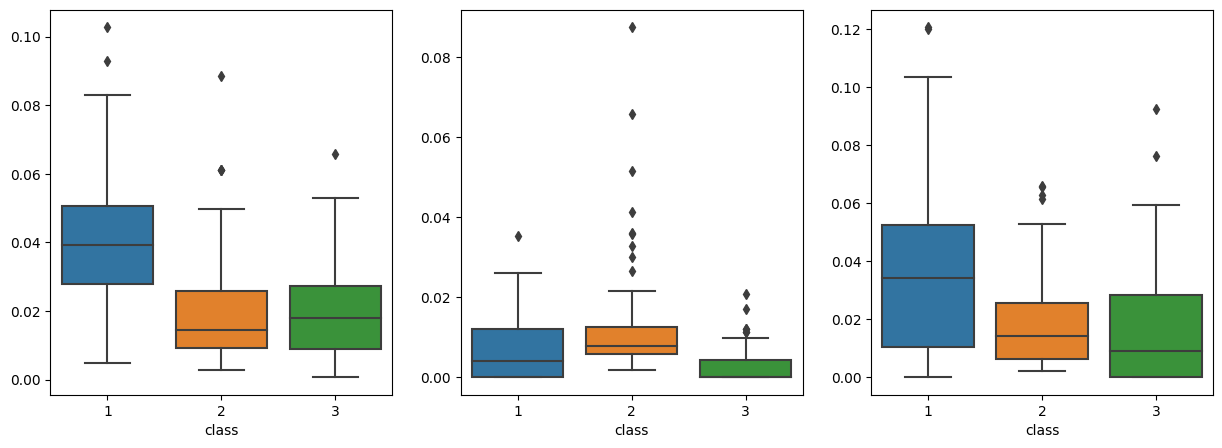

In [218]:
zero_crossing_x = []
zero_crossing_y = []
zero_crossing_z = []
zero_crossing_x_test = []
zero_crossing_y_test = []
zero_crossing_z_test = []

for i in np.arange(len(li)):
    zero_crossing_x.append(len(np.where(np.diff(np.sign(li[i].x)))[0]) / len(li[i].x))
    zero_crossing_y.append(len(np.where(np.diff(np.sign(li[i].y)))[0]) / len(li[i].y))
    zero_crossing_z.append(len(np.where(np.diff(np.sign(li[i].z)))[0]) / len(li[i].z))

for i in np.arange(len(li_test)):
    zero_crossing_x_test.append(len(np.where(np.diff(np.sign(li_test[i].x)))[0]) / len(li_test[i].x))
    zero_crossing_y_test.append(len(np.where(np.diff(np.sign(li_test[i].y)))[0]) / len(li_test[i].y))
    zero_crossing_z_test.append(len(np.where(np.diff(np.sign(li_test[i].z)))[0]) / len(li_test[i].z))

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=zero_crossing_x,data=d_classes,ax=axs[0])

sns.boxplot(x='class',y=zero_crossing_y,data=d_classes,ax=axs[1])

sns.boxplot(x='class',y=zero_crossing_z,data=d_classes,ax=axs[2])

#### Energy

<AxesSubplot:xlabel='class'>

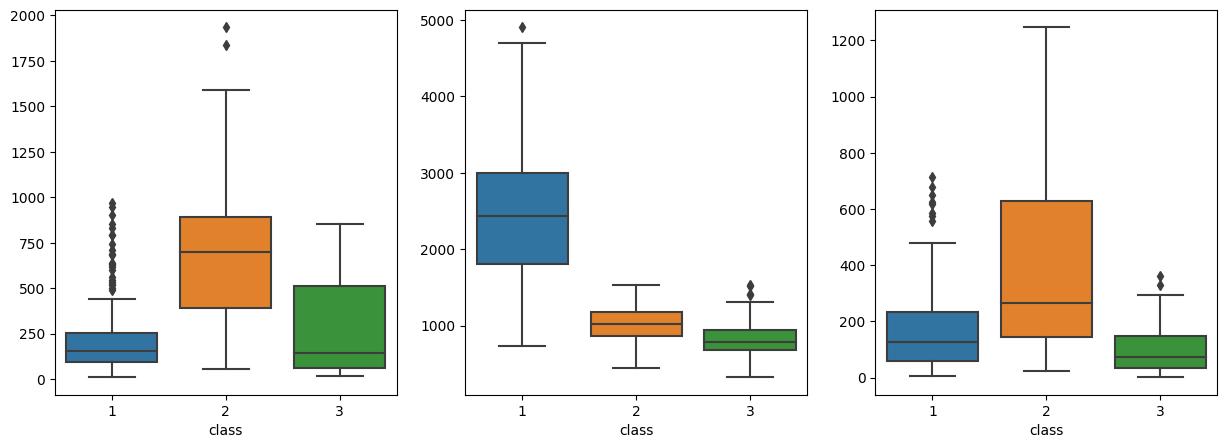

In [219]:
energies_x = []
energies_y = []
energies_z = []
energies_x_test = []
energies_y_test = []
energies_z_test = []

for i in np.arange(len(li)):

    en_x = np.sum(li[i].x**2)
    en_y = np.sum(li[i].y**2)
    en_z = np.sum(li[i].z**2)
    en_tot = np.sum(li[i].x**2+li[i].y**2+li[i].z**2)

    energies_x.append(en_x)
    energies_y.append(en_y)
    energies_z.append(en_z)

for i in np.arange(len(li_test)):
    en_x = np.sum(li_test[i].x**2)
    en_y = np.sum(li_test[i].y**2)
    en_z = np.sum(li_test[i].z**2)
    en_tot = np.sum(li_test[i].x**2+li_test[i].y**2+li_test[i].z**2)

    energies_x_test.append(en_x)
    energies_y_test.append(en_y)
    energies_z_test.append(en_z)

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=energies_x,data=d_classes,ax=axs[0])
sns.boxplot(x='class',y=energies_y,data=d_classes,ax=axs[1])
sns.boxplot(x='class',y=energies_z,data=d_classes,ax=axs[2])

#### Power

<AxesSubplot:xlabel='class'>

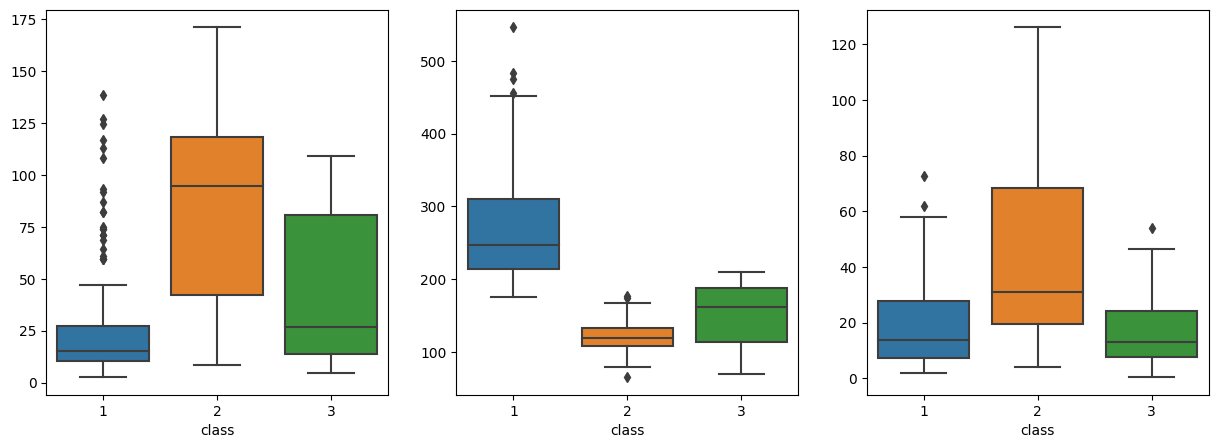

In [220]:
powers_x = []
powers_y = []
powers_z = []
powers_x_test = []
powers_y_test = []
powers_z_test = []

for i in np.arange(len(li)):

    duration = li[i].t[len(li[i])-1]-li[i].t[0]
    pow_x = np.sum(li[i].x**2)/duration
    pow_y = np.sum(li[i].y**2)/duration
    pow_z = np.sum(li[i].z**2)/duration
    en_tot = np.sum(li[i].x**2+li[i].y**2+li[i].z**2)

    powers_x.append(pow_x)
    powers_y.append(pow_y)
    powers_z.append(pow_z)

for i in np.arange(len(li_test)):
    duration = li_test[i].t[len(li_test[i])-1]-li_test[i].t[0]
    pow_x = np.sum(li_test[i].x**2)/duration
    pow_y = np.sum(li_test[i].y**2)/duration
    pow_z = np.sum(li_test[i].z**2)/duration
    en_tot = np.sum(li_test[i].x**2+li_test[i].y**2+li_test[i].z**2)

    powers_x_test.append(pow_x)
    powers_y_test.append(pow_y)
    powers_z_test.append(pow_z)

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=powers_x,data=d_classes,ax=axs[0])
sns.boxplot(x='class',y=powers_y,data=d_classes,ax=axs[1])
sns.boxplot(x='class',y=powers_z,data=d_classes,ax=axs[2])

#### Skewness

<AxesSubplot:xlabel='class'>

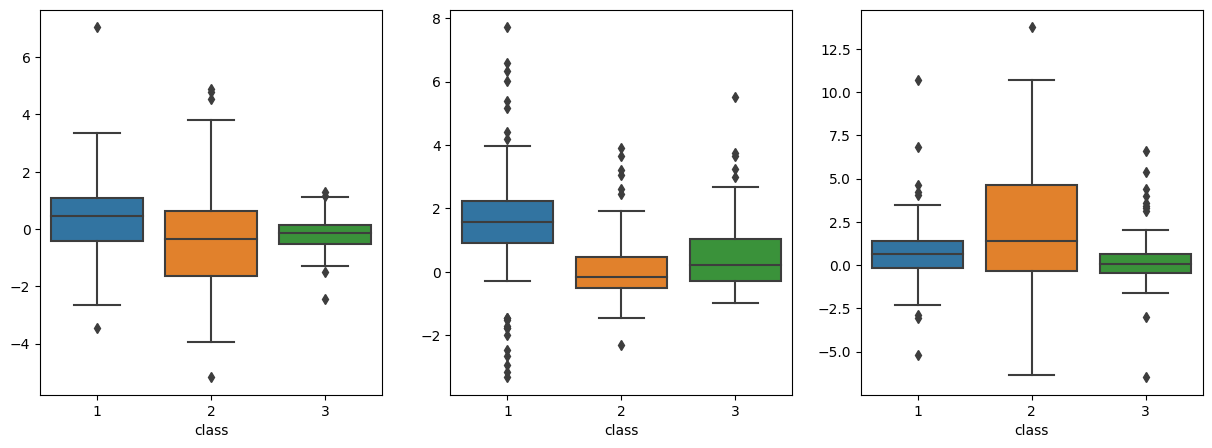

In [221]:
from scipy.stats import skew

skew_x = []
skew_y = []
skew_z = []
skew_x_test = []
skew_y_test = []
skew_z_test = []

for i in np.arange(len(li)):
    skew_x.append(skew(li[i].x))
    skew_y.append(skew(li[i].y))
    skew_z.append(skew(li[i].z))

for i in np.arange(len(li_test)):
    skew_x_test.append(skew(li_test[i].x))
    skew_y_test.append(skew(li_test[i].y))
    skew_z_test.append(skew(li_test[i].z))

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=skew_x,data=d_classes,ax=axs[0])
sns.boxplot(x='class',y=skew_y,data=d_classes,ax=axs[1])
sns.boxplot(x='class',y=skew_z,data=d_classes,ax=axs[2])


#### Kurtosis

(-10.0, 160.0)

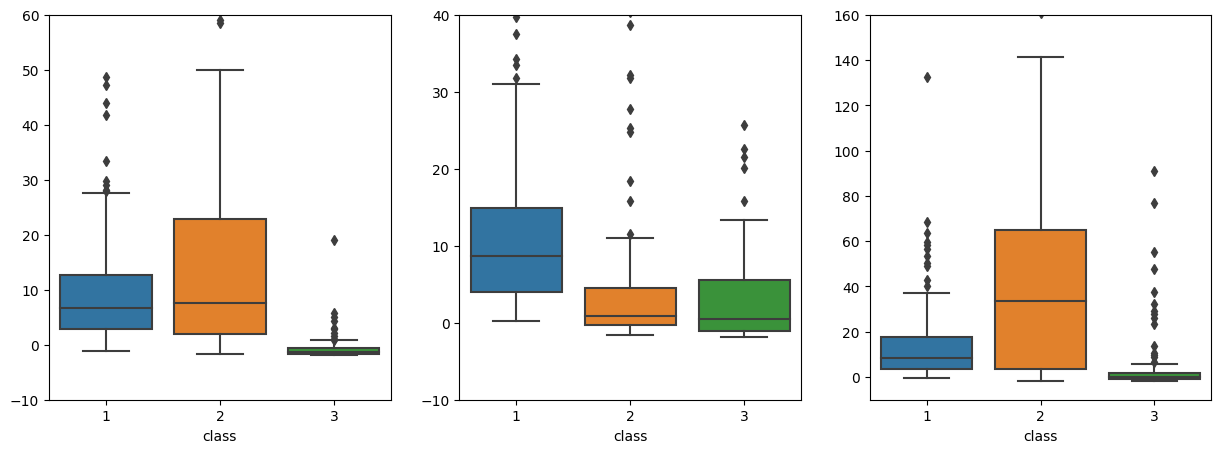

In [222]:
from scipy.stats import kurtosis

kurtosis_x = []
kurtosis_y = []
kurtosis_z = []
kurtosis_x_test = []
kurtosis_y_test = []
kurtosis_z_test = []

for i in np.arange(len(li)):
    kurtosis_x.append(kurtosis(li[i].x))
    kurtosis_y.append(kurtosis(li[i].y))
    kurtosis_z.append(kurtosis(li[i].z))

for i in np.arange(len(li_test)):
    kurtosis_x_test.append(kurtosis(li_test[i].x))
    kurtosis_y_test.append(kurtosis(li_test[i].y))
    kurtosis_z_test.append(kurtosis(li_test[i].z))

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=kurtosis_x,data=d_classes,ax=axs[0])
axs[0].set_ylim(-10,60)
sns.boxplot(x='class',y=kurtosis_y,data=d_classes,ax=axs[1])
axs[1].set_ylim(-10,40)
sns.boxplot(x='class',y=kurtosis_z,data=d_classes,ax=axs[2])
axs[2].set_ylim(-10,160)

#### Entropy

<AxesSubplot:xlabel='class'>

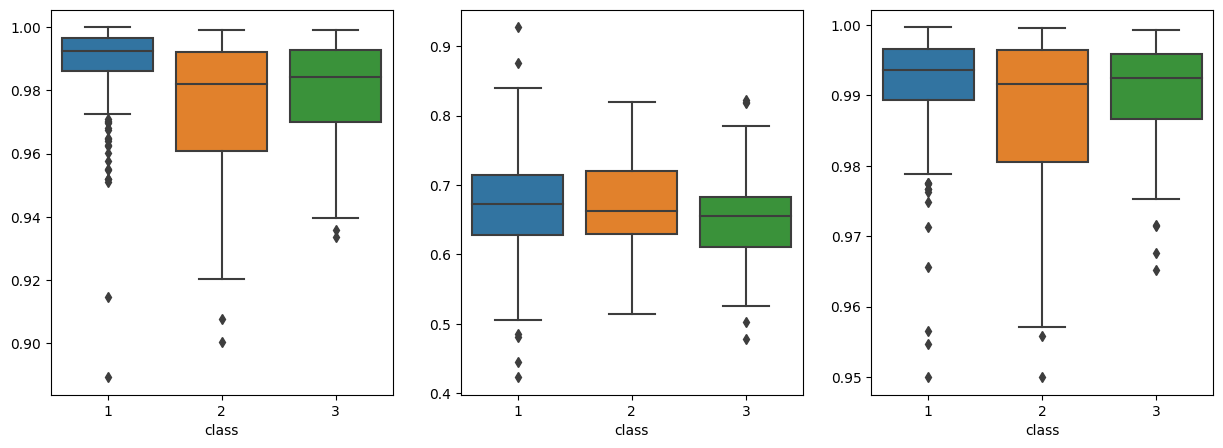

In [223]:
entropy_x = []
entropy_y = []
entropy_z = []
entropy_x_test = []
entropy_y_test = []
entropy_z_test = []

for i in np.arange(len(li)):
    valuex, countsx = np.unique(li[i].x, return_counts=True)
    px = countsx / countsx.sum()
    px = px[np.where(px != 0)]
    if np.log2(len(li[i].x)) == 1:
        entropy_x.append(0)
    elif np.sum(px * np.log2(px)) / np.log2(len(li[i].x)) == 0:
        entropy_x.append(0)
    else:
        entropy_x.append(- np.sum(px * np.log2(px)) / np.log2(len(li[i].x)))
        
    valuey, countsy = np.unique(li[i].y, return_counts=True)
    py = countsy / countsy.sum()
    py = py[np.where(py != 0)]
    if np.log2(len(li[i].y)) == 1:
        entropy_y.append(0)
    elif np.sum(py * np.log2(py)) / np.log2(len(li[i].y)) == 0:
        entropy_y.append(0)
    else:
        entropy_y.append(- np.sum(py * np.log2(py)) / np.log2(len(li[i].y)))
        
    valuez, countsz = np.unique(li[i].z, return_counts=True)
    pz = countsz / countsz.sum()
    pz = pz[np.where(pz != 0)]
    if np.log2(len(li[i].z)) == 1:
        entropy_z.append(0)
    elif np.sum(pz * np.log2(pz)) / np.log2(len(li[i].z)) == 0:
        entropy_z.append(0)
    else:
        entropy_z.append(- np.sum(pz * np.log2(pz)) / np.log2(len(li[i].z)))

for i in np.arange(len(li_test)):
    valuex, countsx = np.unique(li_test[i].x, return_counts=True)
    px = countsx / countsx.sum()
    px = px[np.where(px != 0)]
    if np.log2(len(li_test[i].x)) == 1:
        entropy_x_test.append(0)
    elif np.sum(px * np.log2(px)) / np.log2(len(li_test[i].x)) == 0:
        entropy_x_test.append(0)
    else:
        entropy_x_test.append(- np.sum(px * np.log2(px)) / np.log2(len(li_test[i].x)))
        
    valuey, countsy = np.unique(li_test[i].y, return_counts=True)
    py = countsy / countsy.sum()
    py = py[np.where(py != 0)]
    if np.log2(len(li_test[i].y)) == 1:
        entropy_y_test.append(0)
    elif np.sum(py * np.log2(py)) / np.log2(len(li_test[i].y)) == 0:
        entropy_y_test.append(0)
    else:
        entropy_y_test.append(- np.sum(py * np.log2(py)) / np.log2(len(li_test[i].y)))
        
    valuez, countsz = np.unique(li_test[i].z, return_counts=True)
    pz = countsz / countsz.sum()
    pz = pz[np.where(pz != 0)]
    if np.log2(len(li_test[i].z)) == 1:
        entropy_z_test.append(0)
    elif np.sum(pz * np.log2(pz)) / np.log2(len(li_test[i].z)) == 0:
        entropy_z_test.append(0)
    else:
        entropy_z_test.append(- np.sum(pz * np.log2(pz)) / np.log2(len(li_test[i].z)))
   
fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=entropy_x,data=d_classes,ax=axs[0])

sns.boxplot(x='class',y=entropy_y,data=d_classes,ax=axs[1])

sns.boxplot(x='class',y=entropy_z,data=d_classes,ax=axs[2])

#### Temporal Centroid

<AxesSubplot:xlabel='class'>

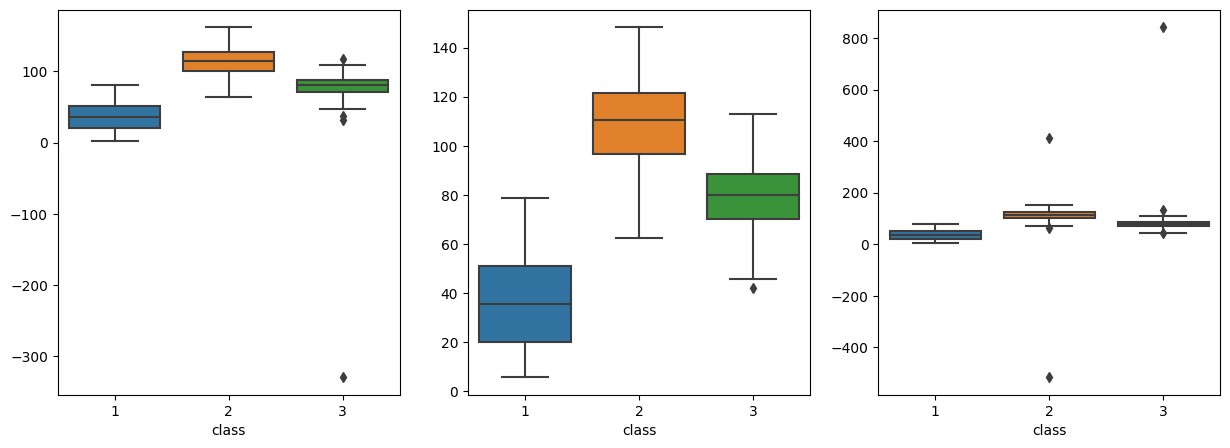

In [224]:
temporal_centroid_x = []
temporal_centroid_y = []
temporal_centroid_z = []
temporal_centroid_x_test = []
temporal_centroid_y_test = []
temporal_centroid_z_test = []

for i in np.arange(len(li)):
    temporal_centroid_x.append(np.sum(li[i].t * li[i].x) / np.sum(li[i].x))
    temporal_centroid_y.append(np.sum(li[i].t * li[i].y) / np.sum(li[i].y))
    temporal_centroid_z.append(np.sum(li[i].t * li[i].z) / np.sum(li[i].z))

for i in np.arange(len(li_test)):
    temporal_centroid_x_test.append(np.sum(li_test[i].t * li_test[i].x) / np.sum(li_test[i].x))
    temporal_centroid_y_test.append(np.sum(li_test[i].t * li_test[i].y) / np.sum(li_test[i].y))
    temporal_centroid_z_test.append(np.sum(li_test[i].t * li_test[i].z) / np.sum(li_test[i].z))

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=temporal_centroid_x,data=d_classes,ax=axs[0])

sns.boxplot(x='class',y=temporal_centroid_y,data=d_classes,ax=axs[1])

sns.boxplot(x='class',y=temporal_centroid_z,data=d_classes,ax=axs[2])

### Create final dataset

In [241]:
data = pd.DataFrame({'mean_x': means_x,
                    'mean_y': means_y,
                    'var_x': vars_x,
                    'var_y': vars_y,
                    'var_z': vars_z,
                    'rms_x': rms_x,
                    'rms_y': rms_y,
                    'rms_z': rms_z,
                    'iq_range_x': interq_x,
                    'iq_range_y': interq_y,
                    'iq_range_z': interq_z,
                    'max-min_x': delta_x,
                    'max-min_y': delta_y,
                    'max-min_z': delta_z,
                    '%_peaks_x': peaks_x,
                    '%_peaks_y': peaks_y,
                    '%_positive_y': pn_y,
                    'power_x': powers_x,
                    'power_y': powers_y,
                    'power_z': powers_z,
                    'temporal_centroid_x': temporal_centroid_x,
                    'temporal_centroid_y': temporal_centroid_y,
                    'temporal_centroid_z': temporal_centroid_z
                    })

data_test = pd.DataFrame({'mean_x': means_x_test,
                    'mean_y': means_y_test,
                    'var_x': vars_x_test,
                    'var_y': vars_y_test,
                    'var_z': vars_z_test,
                    'rms_x': rms_x_test,
                    'rms_y': rms_y_test,
                    'rms_z': rms_z_test,
                    'iq_range_x': interq_x_test,
                    'iq_range_y': interq_y_test,
                    'iq_range_z': interq_z_test,
                    'max-min_x': delta_x_test,
                    'max-min_y': delta_y_test,
                    'max-min_z': delta_z_test,
                    '%_peaks_x': peaks_x_test,
                    '%_peaks_y': peaks_y_test,
                    '%_positive_y': pn_y_test,
                    'power_x': powers_x_test,
                    'power_y': powers_y_test,
                    'power_z': powers_z_test,
                    'temporal_centroid_x': temporal_centroid_x_test,
                    'temporal_centroid_y': temporal_centroid_y_test,
                    'temporal_centroid_z': temporal_centroid_z_test
                    })

            
data = pd.concat([data,d_classes],axis=1)
data = data.drop('code',axis=1)
data = data.drop('class10',axis=1)
data

data_test = pd.concat([data_test,d_classes_test],axis=1)
data_test = data_test.drop('code',axis=1)
data_test

,mean_x,mean_y,var_x,var_y,var_z,rms_x,rms_y,rms_z,iq_range_x,iq_range_y,...,%_peaks_x,%_peaks_y,%_positive_y,power_x,power_y,power_z,temporal_centroid_x,temporal_centroid_y,temporal_centroid_z,class
0,-0.008444,0.928649,0.027531,0.104290,0.020528,0.166120,0.983186,0.440268,0.143117,0.240890,...,0.019621,0.225531,1.000000,5.652883,198.014268,39.706242,18.162136,13.874871,14.058362,1
1,0.089591,0.986425,0.085244,0.169095,0.019054,0.305344,1.068671,0.248075,0.116523,0.098720,...,0.065990,0.299069,0.995770,19.102715,233.994005,12.609092,21.949375,21.980378,21.834106,1
2,-0.062488,0.981550,0.100064,0.606218,0.035557,0.322268,1.252590,0.249568,0.283471,0.203385,...,0.067039,0.424581,0.912849,21.294748,321.704290,12.770801,56.002210,54.728976,54.719678,1
3,-0.110842,0.938129,0.036798,0.011935,0.011871,0.221473,0.944463,0.352806,0.370368,0.114520,...,0.000000,0.230699,1.000000,10.054790,182.852915,25.515479,69.366426,71.146506,70.782753,3
4,0.048903,0.289343,0.181369,0.510082,0.210941,0.428547,0.770388,0.745099,0.193931,1.267670,...,0.075179,0.082936,0.542363,37.628614,121.601601,113.749240,102.400716,102.344907,107.735554,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,-0.111464,0.904448,0.043100,0.010563,0.013516,0.235558,0.910264,0.418527,0.376600,0.173760,...,0.000000,0.132489,1.000000,11.373969,169.843904,35.905696,65.747901,63.648280,64.159304,3
90,0.123741,0.965479,0.045361,0.096149,0.015758,0.246279,1.014030,0.307062,0.220490,0.185660,...,0.073336,0.298008,1.000000,12.426755,210.670269,19.317626,22.455172,22.104156,21.866425,1
91,-0.076577,0.982110,0.418798,1.775208,0.291493,0.651432,1.654837,0.569511,0.359162,0.555805,...,0.249288,0.382479,0.831909,86.979055,561.289305,66.478337,34.322055,33.428294,33.146341,1
92,0.083095,0.983450,0.050666,0.502631,0.013229,0.239887,1.212252,0.115581,0.141397,0.323840,...,0.059940,0.320180,0.902098,11.790676,301.100096,2.737150,33.228721,33.170255,31.344229,1


#### **Study of correlation**

<AxesSubplot:>

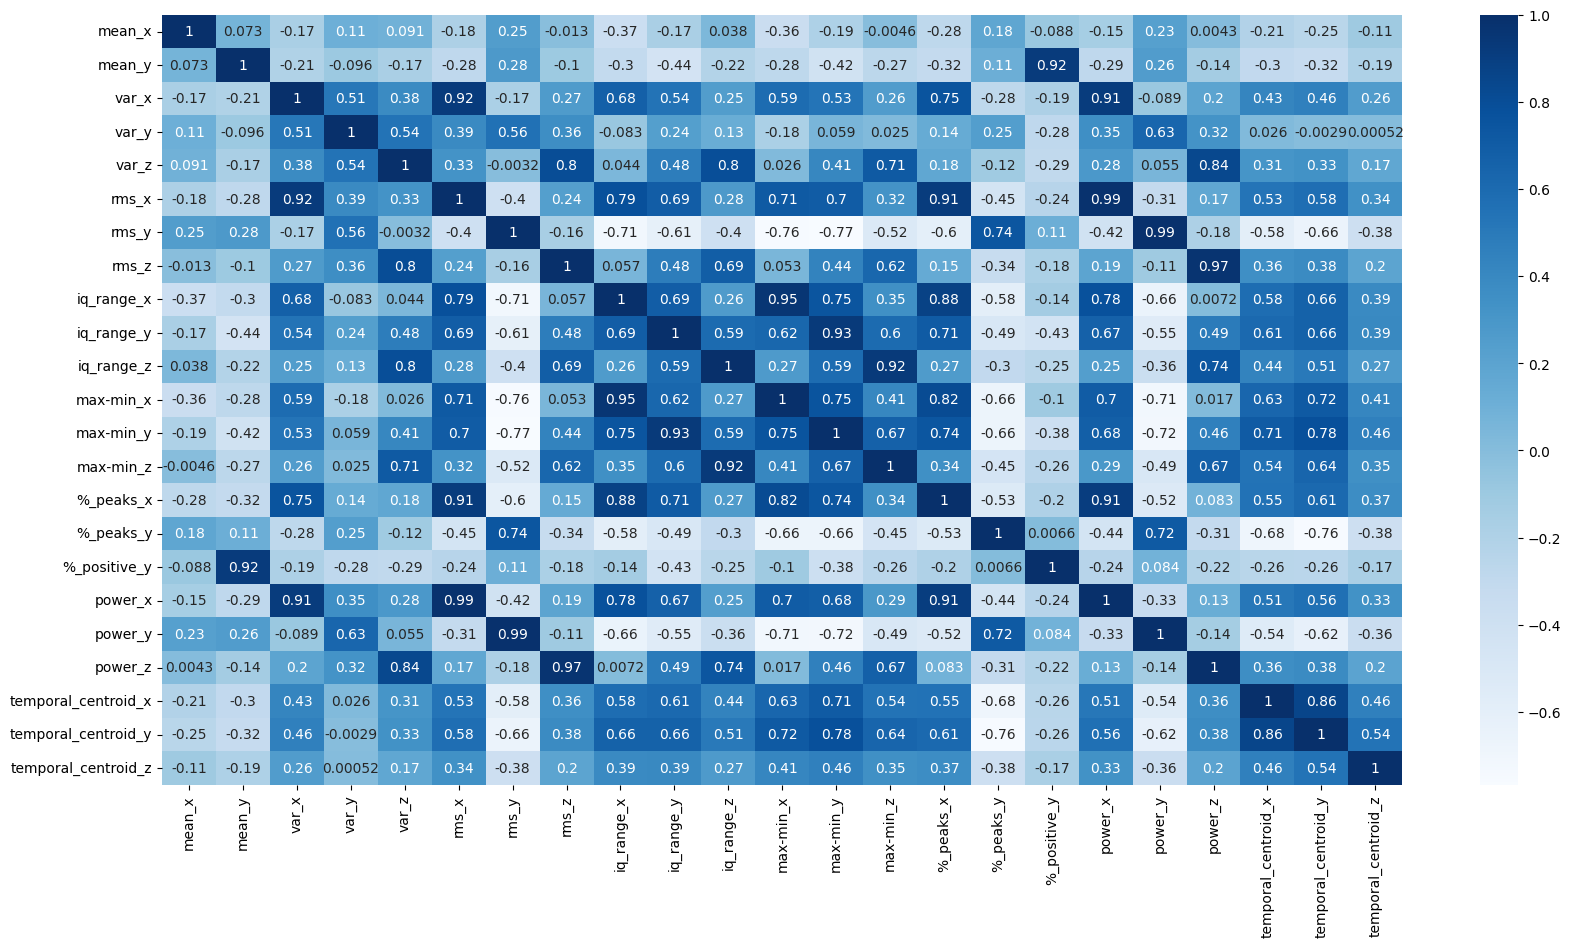

In [242]:
Corr_matrix=data.iloc[:,:-1].corr()
plt.figure(figsize = (20,10))
sns.heatmap(Corr_matrix, annot=True, cmap="Blues")

In [243]:
# remove highly correlated features 
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.iloc[:,:-1].corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(data, 0.8)
print('correlated features: ', corr_features)

correlated features:  {'max-min_x', 'max-min_z', 'power_x', 'rms_x', 'power_y', '%_peaks_x', 'temporal_centroid_y', 'power_z', 'max-min_y', 'rms_z', '%_positive_y'}


#### Removing correlated features

In [244]:
data = data.drop(corr_features,axis=1)
data

data_test = data_test.drop(corr_features,axis=1)
data_test

,mean_x,mean_y,var_x,var_y,var_z,rms_y,iq_range_x,iq_range_y,iq_range_z,%_peaks_y,temporal_centroid_x,temporal_centroid_z,class
0,-0.008444,0.928649,0.027531,0.104290,0.020528,0.983186,0.143117,0.240890,0.141253,0.225531,18.162136,14.058362,1
1,0.089591,0.986425,0.085244,0.169095,0.019054,1.068671,0.116523,0.098720,0.083498,0.299069,21.949375,21.834106,1
2,-0.062488,0.981550,0.100064,0.606218,0.035557,1.252590,0.283471,0.203385,0.157942,0.424581,56.002210,54.719678,1
3,-0.110842,0.938129,0.036798,0.011935,0.011871,0.944463,0.370368,0.114520,0.135650,0.230699,69.366426,70.782753,3
4,0.048903,0.289343,0.181369,0.510082,0.210941,0.770388,0.193931,1.267670,0.662250,0.082936,102.400716,107.735554,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,-0.111464,0.904448,0.043100,0.010563,0.013516,0.910264,0.376600,0.173760,0.188320,0.132489,65.747901,64.159304,3
90,0.123741,0.965479,0.045361,0.096149,0.015758,1.014030,0.220490,0.185660,0.113545,0.298008,22.455172,21.866425,1
91,-0.076577,0.982110,0.418798,1.775208,0.291493,1.654837,0.359162,0.555805,0.308791,0.382479,34.322055,33.146341,1
92,0.083095,0.983450,0.050666,0.502631,0.013229,1.212252,0.141397,0.323840,0.101146,0.320180,33.228721,31.344229,1


#### Final Features

<AxesSubplot:>

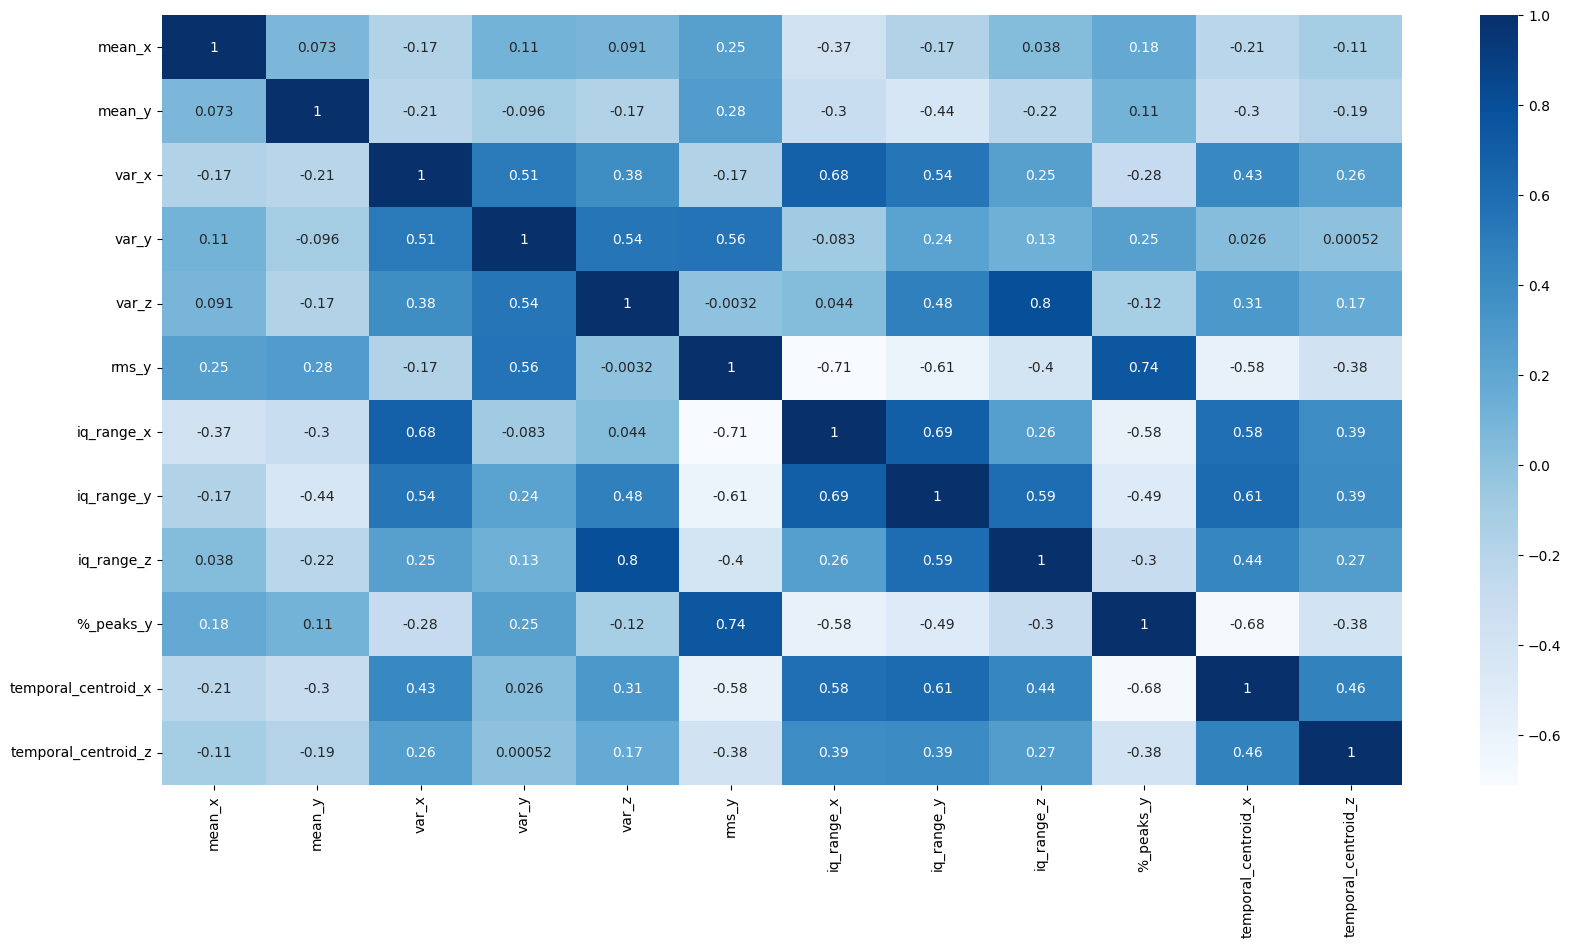

In [245]:
Corr_matrix=data.iloc[:,:-1].corr() #between all possible pairs of variable, df è il nostro dataframe
plt.figure(figsize = (20,10))
sns.heatmap(Corr_matrix, annot=True, cmap="Blues")

### **Classification**

In [246]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [247]:
X_train=data.iloc[:,:-1]
y_train=data.iloc[:,-1].values

X_test=data_test.iloc[:,:-1]
y_test=data_test.iloc[:,-1].values

#### Normalization

In [249]:
scaler=StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Cross Validation applied to different models

In [250]:
from sklearn.model_selection import cross_validate, GridSearchCV

#### SVM

In [251]:
from sklearn import svm

svmc = svm.SVC(random_state=42)
param_grid = [{'kernel': ['linear'],'C': [1, 10, 100, 1000], 'gamma': [0]},
  {'kernel': ['rbf', 'poly', 'sigmoid'],'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], }, 
]

grid_search_svm = GridSearchCV(estimator=svmc, param_grid=param_grid, cv=10, n_jobs=-1, verbose=2)
grid_search_svm.fit(X_train_scaled, y_train)
print(grid_search_svm.best_params_)
print(grid_search_svm.best_score_)

Fitting 10 folds for each of 28 candidates, totalling 280 fits
{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.9760312944523472


#### Random Forest

In [252]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 10, 15, 20]
    }  

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train_scaled, y_train)
print(grid_search_rf.best_params_)
print(grid_search_rf.best_score_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
{'max_depth': 5, 'n_estimators': 300}
0.9760312944523472


#### Logistic Regression

In [253]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression classifier
reglog = LogisticRegression(multi_class='multinomial', random_state = 42)
scores = cross_validate(reglog, X_train_scaled, y_train, cv=10)

print(scores['test_score'].mean())

0.9679231863442391


#### KNN

In [254]:
from sklearn.neighbors import KNeighborsClassifier

# perform grid search cv
knn = KNeighborsClassifier()
params = {'n_neighbors': list(range(1, 20)), 'p': [1, 2]}
grid_search_knn = GridSearchCV(knn, params, cv=10, scoring='accuracy')
grid_search_knn.fit(X_train_scaled, y_train)
print(grid_search_knn.best_params_)
print(grid_search_knn.best_score_)

{'n_neighbors': 3, 'p': 1}
0.9786628733997157


#### Select the best model 

In [255]:
win_svm = svm.SVC(C=grid_search_svm.best_params_['C'],
                  kernel=grid_search_svm.best_params_['kernel'],
                  gamma=grid_search_svm.best_params_['gamma'],
                  random_state=42)

win_rf = RandomForestClassifier(n_estimators=grid_search_rf.best_params_['n_estimators'],
                                max_depth=grid_search_rf.best_params_['max_depth'],
                                random_state=42)

win_knn = KNeighborsClassifier(n_neighbors=grid_search_knn.best_params_['n_neighbors'],p=grid_search_knn.best_params_['p'])

scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
scores_svm = cross_validate(win_svm, X_train_scaled, y_train, cv=10, scoring=scoring)
scores_rf = cross_validate(win_rf, X_train_scaled, y_train, cv=10, scoring=scoring)
scores_reglog = cross_validate(reglog, X_train_scaled, y_train, cv=10, scoring=scoring)
scores_knn = cross_validate(win_knn, X_train_scaled, y_train, cv=10, scoring=scoring)

# Create a dataframe with first column with names of models and second column with mean accuracy scores
scores = pd.DataFrame({'model': ['svm', 'rf', 'reglog', 'knn'],
                       'accuracy': [scores_svm['test_accuracy'].mean(),
                                    scores_rf['test_accuracy'].mean(),
                                    scores_reglog['test_accuracy'].mean(),
                                    scores_knn['test_accuracy'].mean()],

                       'precision': [scores_svm['test_precision_macro'].mean(),
                                     scores_rf['test_precision_macro'].mean(),
                                     scores_reglog['test_precision_macro'].mean(),
                                     scores_knn['test_precision_macro'].mean()],

                       'recall': [scores_svm['test_recall_macro'].mean(),
                                  scores_rf['test_recall_macro'].mean(),
                                  scores_reglog['test_recall_macro'].mean(),
                                  scores_knn['test_recall_macro'].mean()],

                       'f1': [scores_svm['test_f1_macro'].mean(),
                              scores_rf['test_f1_macro'].mean(),
                              scores_reglog['test_f1_macro'].mean(),
                              scores_knn['test_f1_macro'].mean()]
                        })

# Print the dataframe
scores

,model,accuracy,precision,recall,f1
0,svm,0.976031,0.976561,0.970636,0.971604
1,rf,0.976031,0.973538,0.971773,0.971441
2,reglog,0.967923,0.969124,0.960409,0.963127
3,knn,0.978663,0.977377,0.974803,0.974770


#### Best model 

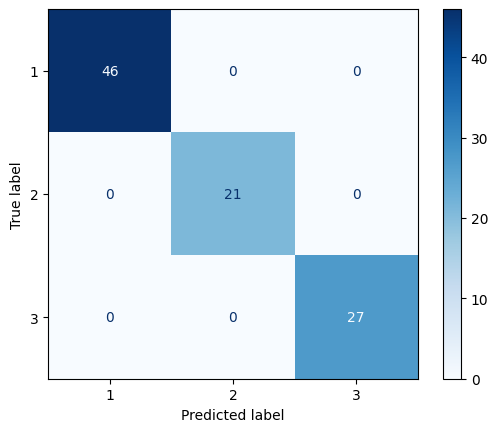

In [256]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

win_svm.fit(X_train_scaled, y_train)
y_pred = win_svm.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm,display_labels=win_svm.classes_)
disp.plot(cmap='Blues')

Addendum - 10 Classes

In [257]:
#try our models on the 10 classes dataset
X10_train=data.iloc[:,:-1]
y10_train=d_classes['class10'].values

X10_test=data_test.iloc[:,:-1]
y10_test=d_classes_test['class10'].values

scaler=StandardScaler()

X10_train_scaled = scaler.fit_transform(X10_train)
X10_test_scaled = scaler.transform(X10_test)

win_svm.fit(X10_train_scaled, y10_train)
y10_pred = win_svm.predict(X10_test_scaled)

cm = confusion_matrix(y10_test, y10_pred)
disp = ConfusionMatrixDisplay(cm,display_labels=win_svm.classes_)
disp.plot(cmap='Blues')

win_rf.fit(X10_train_scaled, y10_train)
y10_pred = win_rf.predict(X10_test_scaled)

cm = confusion_matrix(y10_test, y10_pred)
disp = ConfusionMatrixDisplay(cm,display_labels=win_rf.classes_)
disp.plot(cmap='Blues')

win_knn.fit(X10_train_scaled, y10_train)
y10_pred = win_knn.predict(X10_test_scaled)

cm = confusion_matrix(y10_test, y10_pred)
disp = ConfusionMatrixDisplay(cm,display_labels=win_knn.classes_)
disp.plot(cmap='Blues')

reglog.fit(X10_train_scaled, y10_train)
y10_pred = reglog.predict(X10_test_scaled)

cm = confusion_matrix(y10_test, y10_pred)
disp = ConfusionMatrixDisplay(cm,display_labels=reglog.classes_)
disp.plot(cmap='Blues')


KeyError: 'class10'

In [ ]:
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
scores_10svm = cross_validate(win_svm, X10_train_scaled, y10_train, cv=10, scoring=scoring)
scores_10rf = cross_validate(win_rf, X10_train_scaled, y10_train, cv=10, scoring=scoring)
scores_10reglog = cross_validate(reglog, X10_train_scaled, y10_train, cv=10, scoring=scoring)
scores_10knn = cross_validate(win_knn, X10_train_scaled, y10_train, cv=10, scoring=scoring)

# Create a dataframe with first column with names of models and second column with mean accuracy scores
scores10 = pd.DataFrame({'model': ['svm', 'rf', 'reglog', 'knn'],
                       'accuracy': [scores_10svm['test_accuracy'].mean(),
                                    scores_10rf['test_accuracy'].mean(),
                                    scores_10reglog['test_accuracy'].mean(),
                                    scores_10knn['test_accuracy'].mean()],

                       'precision': [scores_10svm['test_precision_macro'].mean(),
                                     scores_10rf['test_precision_macro'].mean(),
                                     scores_10reglog['test_precision_macro'].mean(),
                                     scores_10knn['test_precision_macro'].mean()],

                       'recall': [scores_10svm['test_recall_macro'].mean(),
                                  scores_10rf['test_recall_macro'].mean(),
                                  scores_10reglog['test_recall_macro'].mean(),
                                  scores_10knn['test_recall_macro'].mean()],

                       'f1': [scores_10svm['test_f1_macro'].mean(),
                              scores_10rf['test_f1_macro'].mean(),
                              scores_10reglog['test_f1_macro'].mean(),
                              scores_10knn['test_f1_macro'].mean()]
                        })

# Print the dataframe
scores10

,model,accuracy,precision,recall,f1
0,svm,0.976031,0.976561,0.970636,0.971604
1,rf,0.976031,0.973538,0.971773,0.971441
2,reglog,0.967923,0.969124,0.960409,0.963127
3,knn,0.978663,0.977377,0.974803,0.974770
